### Inputs

In [1]:
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

from CSIKit.reader import get_reader
from CSIKit.tools.batch_graph import *
from CSIKit.tools.convert_csv import *
from CSIKit.util import csitools

import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Converting to csv functions

In [2]:
def convert_pcap_to_csv(inp):
    infile = inp
    inp = inp.replace("pcap","csv")
    outfile = "csi_tests_csv/" + inp
    generate_csv(infile, outfile, "amplitude")
    
    
# file_name = ["Falldown_","Hand_circle_","Hand_move_up_","Nothing_","Smoking_","Walking_along_","Walking_Perpendicular_"]
# for i in range(len(file_name)):
#     temp = file_name[i]
#     for j in range(15):
#         convert_pcap_to_csv(temp + str(j+1)+".pcap")
        

### One heatmap plot function

In [3]:
def plot1(inp):
    my_reader = get_reader(inp)
    csi_data = my_reader.read_file(inp, scaled=True)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")

    bg = BatchGraph(inp)
    bg.heatmap()

### File lists

In [4]:
pcap_lst = ["csi_tests_pcap/" + f for f in listdir('csi_tests_pcap')]
csv_lst = ["csi_tests_csv/" + f for f in listdir('csi_tests_csv')]

### List of csv file dataframes

In [5]:
lst = []
l = {x for x in range(257)} 

for filename in csv_lst:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = np.arange(0,len(df.columns))
    lst.append(df)
lst[10]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,28.457180,42.784106,28.325089,34.112829,34.421661,26.821451,51.955261,52.327726,52.091342,52.653085,...,53.146802,52.353769,52.921608,52.829776,52.971584,33.064250,28.401061,24.842998,29.712758,27.160033
1,38.836614,42.784106,47.807852,45.083007,46.052296,46.444780,47.064276,43.473300,45.840597,44.720247,...,49.483396,49.812023,48.958036,50.863776,48.388554,48.068919,49.424892,50.388982,46.119887,28.721563
2,22.944662,42.784106,25.118834,32.000293,30.374265,31.784013,53.028610,52.124034,52.534349,52.171390,...,53.066952,52.776963,52.711094,53.557082,53.090379,20.644580,24.232459,31.489110,24.082400,23.384565
3,36.074550,42.784106,47.908549,45.750030,47.891434,46.729287,45.642517,43.465877,44.385423,45.693388,...,49.743919,49.791157,48.848916,50.736231,48.693843,47.494426,48.763333,49.741661,46.898414,35.428254
4,19.542425,42.784106,14.623980,24.424798,30.507663,24.232459,52.332830,51.407248,52.694055,51.412271,...,52.907578,53.197076,53.446221,52.665139,52.839906,33.443923,32.557548,22.878017,29.675480,23.541084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,32.782962,42.784106,39.268567,41.167737,35.446880,37.148325,43.721200,36.372895,38.588379,35.346606,...,46.664525,46.635502,46.124448,45.953308,44.080533,44.886212,43.309208,42.208400,41.367206,39.461082
291,19.493900,42.784106,32.216750,28.325089,26.551384,34.712917,44.033436,42.544272,39.910931,42.663258,...,46.536948,45.964321,45.445269,45.402919,43.706426,32.296818,37.160033,12.304489,26.273659,17.853298
292,37.965743,42.784106,36.057359,41.031877,38.909796,42.325387,44.801363,39.302357,39.578945,39.602329,...,49.272677,48.822398,47.932944,48.581159,44.367509,49.965336,43.127907,46.457562,48.547310,37.308630
293,25.954962,42.784106,30.681859,23.541084,11.139434,26.857417,38.078731,38.261396,37.188337,40.096633,...,44.847553,46.597736,44.516022,44.082400,43.195016,32.387986,21.367206,27.497363,29.894498,19.867717


### Amplitude heatmap

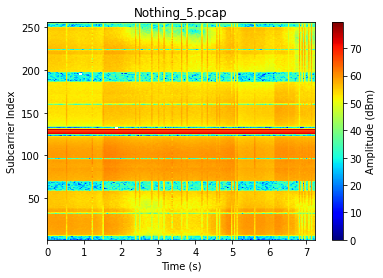

In [6]:
plot1(pcap_lst[55])

### Line plot of one subcarrier

<AxesSubplot:>

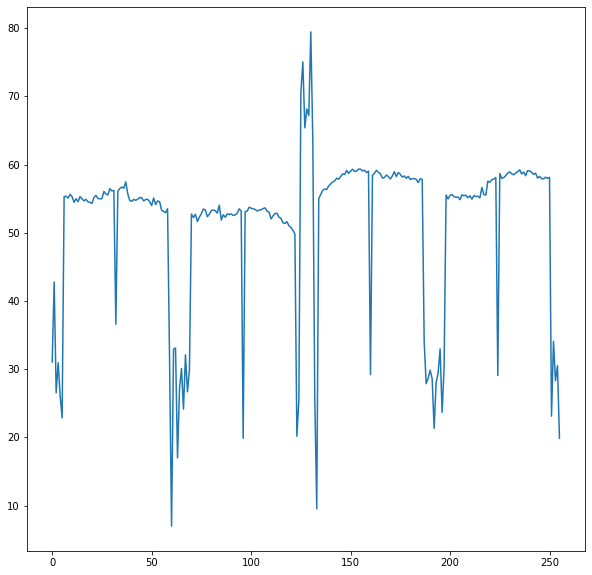

In [7]:
pd.DataFrame(lst[55].iloc[10]).plot.line(figsize=
[10,10], legend=False)

### Subcarrier correlation plot

In [8]:
# i=0
# for DataFrame in lst:
#     plt.title(csv_lst[i][14::])
#     sns.heatmap(DataFrame.corr())
#     plt.show()
#     i+=1
for DataFrame in lst:
    print(DataFrame.sum())
    

0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
251   -inf
252   -inf
253   -inf
254   -inf
255   -inf
Length: 256, dtype: float64
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
251   -inf
252   -inf
253   -inf
254   -inf
255   -inf
Length: 256, dtype: float64
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
251   -inf
252   -inf
253   -inf
254   -inf
255   -inf
Length: 256, dtype: float64
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
251   -inf
252   -inf
253   -inf
254   -inf
255   -inf
Length: 256, dtype: float64
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
251   -inf
252   -inf
253   -inf
254   -inf
255   -inf
Length: 256, dtype: float64
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
251   -inf
252   -inf
253   -inf
254   -inf
255   -inf
Length: 256, dtype: float64
0      3968.732614
1      5433.581464
2      5043.791200
3      5091.173083
4      5181.658332
          .

In [9]:
for DataFrame in lst:
    DataFrame.replace(-np.inf, np.nan, inplace=True)
    DataFrame.replace(np.nan, DataFrame.mean(), inplace=True)
    print(DataFrame)

           0          1          2          3          4          5    \
0    28.438554  42.784106  25.158738  30.257154  20.530784  29.647309   
1    36.371894  42.784106  48.723311  46.458642  45.775492  46.813950   
2    17.242759  42.784106  31.740598  29.030900  30.989896  20.374265   
3    37.595923  42.784106  45.904517  45.650209  44.639676  46.958318   
4    24.668676  42.784106  28.325089  27.032914  29.840770  32.842051   
..         ...        ...        ...        ...        ...        ...   
325  21.958997  42.784106  29.036325  34.284588  33.376589  33.215984   
326  28.382192  42.784106  50.449981  50.158625  48.549919  48.160622   
327  29.621141  42.784106  39.531342  40.260432  39.893950  40.445909   
328  29.621141  42.784106  39.531342  40.260432  39.893950  40.445909   
329  29.621141  42.784106  39.531342  40.260432  39.893950  40.445909   

           6          7          8          9    ...        246        247  \
0    53.220228  53.448342  53.702021  53.2093

           0          1          2          3          4          5    \
0    30.090257  42.784106  35.063697  29.143432  33.932241  28.992732   
1    37.155019  42.784106  55.413608  55.334988  55.710621  55.738575   
2    29.831751  42.784106  25.763414  32.659964  28.597386  32.526103   
3    37.353593  42.784106  55.531849  56.873372  56.228614  57.045700   
4    31.078880  42.784106  22.671717  31.516762  31.900514  33.723596   
..         ...        ...        ...        ...        ...        ...   
202  34.022614  42.784106  29.084850  29.185545  25.888317  19.912261   
203  35.763414  42.784106  54.758934  55.269412  55.446955  55.758538   
204  31.563880  42.784106  41.615918  42.583535  42.065542  42.867750   
205  31.563880  42.784106  41.615918  42.583535  42.065542  42.867750   
206  31.563880  42.784106  41.615918  42.583535  42.065542  42.867750   

           6          7          8          9    ...        246        247  \
0    56.795669  57.330375  57.089687  57.5409

           0          1          2          3          4          5    \
0    23.443923  42.784106  28.401061  25.954962  23.598355  27.634280   
1    35.852351  42.784106  43.168088  48.507993  47.174042  45.961681   
2    26.683859  42.784106  33.803922  34.761067  32.753114  29.309490   
3    33.354579  42.784106  52.258389  50.042397  50.419332  50.723234   
4    26.364879  42.784106  29.370161  28.573325  29.253121  26.364879   
..         ...        ...        ...        ...        ...        ...   
277  26.020600  42.784106  51.796954  51.715188  52.581822  52.325718   
278   6.020600  42.784106  32.046625  26.273659  28.603380  30.976043   
279  31.335389  42.784106  48.860449  49.117327  48.863102  48.772561   
280  18.129134  42.784106  28.299467  32.898118  24.712917  37.924617   
281  37.315082  42.784106  38.460896  40.216854  46.130909  41.660451   

           6          7          8          9    ...        246        247  \
0    52.794685  53.151219  50.903462  51.6418

           0          1          2          3          4          5    \
0    18.633229  42.784106  22.944662  32.629255  24.345689  19.867717   
1    32.195845  42.784106  49.773806  50.430005  51.582207  51.431554   
2    25.314789  42.784106  27.817554  26.901961  21.335389  28.457180   
3    35.346606  42.784106  48.276923  51.495055  48.567832  50.753462   
4     9.030900  42.784106  21.613680  14.623980  23.673559  30.884905   
..         ...        ...        ...        ...        ...        ...   
207  30.103000  42.784106  31.705551  31.945143  28.305887  29.294189   
208  33.789427  42.784106  43.397693  46.832812  46.355843  47.989129   
209  13.010300  42.784106  29.912261  34.737788  30.663259  29.772662   
210  30.923697  42.784106  43.580301  46.497436  43.640817  46.716541   
211  30.895519  42.784106  44.589248  47.640565  46.127839  47.575479   

           6          7          8          9    ...        246        247  \
0    48.425094  48.975391  49.877780  48.8862

          0          1          2          3          4          5    \
0   13.010300  42.784106  34.667194  33.257209  23.692159  32.805784   
1   47.712934  42.784106  58.076033  57.178344  57.726150  57.051150   
2   23.673559  42.784106  20.969100  15.563025  31.643529  30.852906   
3   45.390761  42.784106  55.463847  52.714513  56.369540  57.140958   
4   28.633229  42.784106  31.389339  36.133132  36.669857  36.283889   
5   43.344739  42.784106  55.373783  53.030772  56.300982  57.447192   
6   18.129134  42.784106  28.041394  31.908917  20.863598  34.830164   
7   34.063698  42.784106  55.359128  51.621490  55.325314  56.933206   
8   23.654880  42.784106  31.287223  34.015728  29.410142  30.000000   
9   38.772561  42.784106  55.629991  51.111011  55.389355  56.898458   
10  20.681859  42.784106  26.127839  31.222159  26.683859  33.558345   
11  41.038379  42.784106  56.074818  56.932247  59.191707  57.886109   
12  21.367206  42.784106  19.030900  27.958800  34.955443  17.85

          0          1          2          3          4          5    \
0   40.425361  42.784106  53.662399  54.323166  54.205317  53.684728   
1   25.118834  42.784106  21.731863  26.989700  25.682017  37.331973   
2   48.802303  42.784106  57.491873  57.781411  55.805703  55.957177   
3   20.043214  42.784106  23.979400  31.290451  35.659658  33.354579   
4   47.625960  42.784106  56.552018  57.240997  55.873629  55.547520   
5   18.692317  42.784106  34.022614  34.158077  32.385479  35.780659   
6   39.203842  42.784106  57.156859  55.909187  57.718145  56.325079   
7   25.314789  42.784106  33.517963  24.149733  26.483600  26.444386   
8   39.618955  42.784106  55.362212  57.371306  56.428413  55.437664   
9   20.530784  42.784106  33.053514  25.051500  26.901961  23.053514   
10  40.062521  42.784106  55.942820  56.437773  56.421528  56.905505   
11  20.681859  42.784106  28.488047   3.010300  31.958997  31.513699   
12  40.766404  42.784106  56.884350  57.529653  56.371383  56.72

           0          1          2          3          4          5    \
0    17.853298  42.784106  23.010300  27.958800  32.678754  35.418288   
1    18.325089  42.784106  26.928469  17.634280  27.242759  28.299467   
2    31.411361  42.784106  24.969296  30.277572  29.566486  29.185545   
3    26.821451  42.784106  30.038912  35.932861  25.118834  32.801229   
4    11.139434  42.784106  23.891661  25.224442  36.076694  29.894498   
..         ...        ...        ...        ...        ...        ...   
228  44.297038  42.784106  54.403816  54.958287  54.666082  54.746023   
229  27.986506  42.784106  31.296899  31.513699  33.257209  22.278867   
230  39.869508  42.784106  49.347256  50.161388  50.956365  50.982698   
231  30.976043  42.784106  37.955324  26.483600  21.613680  27.176705   
232  30.778772  42.784106  39.642813  39.716010  39.513844  40.150346   

           6          7          8          9    ...        246        247  \
0    56.263578  56.362561  56.200631  56.1680

          0          1          2          3          4          5    \
0   20.170333  42.784106  31.643529  15.563025  24.487063  12.304489   
1   12.552725  42.784106  25.224442  26.127839  32.753114  30.374265   
2   20.170333  42.784106  21.702617  33.517963  34.189638  32.041200   
3   26.608655  42.784106  34.712917  28.998205  26.821451  23.117539   
4   43.123889  42.784106  56.984668  56.840191  56.630306  56.650526   
..        ...        ...        ...        ...        ...        ...   
81  26.665180  42.784106  30.480532  34.232459  27.160033  34.959604   
82  24.623980  42.784106  28.169038  22.380461  14.623980  33.003781   
83  24.082400  42.784106  31.869563  30.318123  18.325089  32.753114   
84  23.443923  42.784106  21.367206  35.549735  17.634280  27.435098   
85  17.634280  42.784106  31.442628  34.572762  32.041200  33.257209   

          6          7          8          9    ...        246        247  \
0   35.485123  42.496874  42.318772  38.887971  ...  48.85

           0          1          2          3          4          5    \
0    22.671717  42.784106  29.493900  22.380461  26.608655  36.599162   
1    22.041200  42.784106  35.996648  37.045794  34.739247  28.356906   
2    19.294189  42.784106  28.488047  32.671717  27.242759  33.918169   
3    21.613680  42.784106  31.702617  27.242759  29.566486  32.734643   
4    24.712917  42.784106  18.129134  32.108534  17.160033  34.820156   
..         ...        ...        ...        ...        ...        ...   
125  25.717088  42.784106  26.665180  24.232459  30.000000  27.032914   
126  26.830470  42.784106  29.867717  34.910814  22.278867  30.374265   
127  27.867514  42.784106  28.603380  31.832698  32.552725  35.020172   
128  29.934362  42.784106  25.682017  13.010300  29.449759  29.898946   
129   3.010300  42.784106  19.867717  34.015728  24.653829  29.566486   

           6          7          8          9    ...        246        247  \
0    57.702369  57.141956  57.663095  57.5880

           0          1          2          3          4          5    \
0    28.692317  42.784106  25.587086  24.608978  30.157788  20.043214   
1    39.941411  42.784106  56.117233  55.808851  55.861843  54.838853   
2    17.160033  42.784106  27.067178  26.020600  14.149733  25.224442   
3    42.077151  42.784106  56.273300  55.941472  56.304441  55.461995   
4    27.032914  42.784106  33.157605  33.588862  26.702459  26.190933   
..         ...        ...        ...        ...        ...        ...   
205  37.999605  42.784106  55.815731  56.245152  56.138883  56.142358   
206  23.692159  42.784106  29.410142  24.149733  23.443923  26.821451   
207  36.403820  42.784106  56.896542  56.464684  56.202652  55.814183   
208  22.878017  42.784106  31.598678  26.830470  30.937718  25.118834   
209  41.246672  42.784106  55.495734  55.722639  55.904997  56.172562   

           6          7          8          9    ...        246        247  \
0    56.695958  56.727700  56.453437  56.3953

           0          1          2          3          4          5    \
0    24.232459  42.784106  15.314789  28.234742  29.143432  23.541084   
1    30.157788  42.784106  28.965262  16.989700  23.598355  24.623980   
2    25.670264  42.784106  26.483600  25.865873  32.583978  31.516762   
3    19.084850  42.784106  21.335389  26.857417  20.827854  19.030900   
4    41.513699  42.784106  57.608664  57.482997  57.457094  57.362770   
..         ...        ...        ...        ...        ...        ...   
102  22.552725  42.784106  15.314789  25.118834  26.857417  25.763414   
103  20.170333  42.784106  26.928469  26.273659  24.297523  15.314789   
104  14.149733  42.784106  12.304489  24.668676  25.987905  26.901961   
105  21.367206  42.784106  29.675480  21.139434  27.176705  22.148438   
106  16.127839  42.784106  31.516762  25.987905  31.031193  37.086758   

           6          7          8          9    ...        246        247  \
0    57.227408  56.972721  57.103755  57.3313

           0          1          2          3          4          5    \
0    21.139434  42.784106  31.209028  29.845273  12.304489  26.599162   
1    24.099331  42.784106  19.493900  17.853298  24.232459  29.831751   
2    22.278867  42.784106  15.563025  29.609462  30.507663  29.370161   
3    21.613680  42.784106  16.020600  31.809856  28.286599  32.294258   
4    30.073210  42.784106  27.986506  24.099331  25.118834  26.901961   
..         ...        ...        ...        ...        ...        ...   
172  22.278867  42.784106  21.139434  33.316297  23.873898  27.634280   
173  18.129134  42.784106  31.142773  32.065560  26.273659  26.683859   
174  30.433623  42.784106  27.242759  28.020893  33.692159  33.218055   
175  32.193225  42.784106  27.958800  18.129134  24.345689  36.193021   
176  25.514500  42.784106  20.170333  31.705551  29.694159  26.117233   

           6          7          8          9    ...        246        247  \
0    56.641472  56.706067  57.315565  56.7994

           0          1          2          3          4          5    \
0    23.521825  42.784106   0.000000  33.117539  25.118834  23.598355   
1    23.443923  42.784106  22.504200  32.084414  26.857417  22.278867   
2    17.634280  42.784106  25.477747  21.139434  30.141003  29.449759   
3     3.010300  42.784106  24.842998  25.563025  30.863598  16.127839   
4    26.020600  42.784106  27.160033  22.504200  28.382192  29.036325   
..         ...        ...        ...        ...        ...        ...   
161  15.682017  42.784106  21.613680  23.117539  29.916690  27.176705   
162  19.912261  42.784106  26.242821  20.644580  14.149733  16.532125   
163  23.541084  42.784106  20.530784  31.139434  25.865873  32.543063   
164  26.989700  42.784106  27.032914  15.563025  28.175654  23.873898   
165  28.129134  42.784106  24.955443  18.692317   6.989700  31.392492   

           6          7          8          9    ...        246        247  \
0    56.590115  56.336866  56.632598  56.3093

           0          1          2          3          4          5    \
0    41.195528  42.784106  36.575339  40.253059  68.596409  68.154830   
1    22.552725  42.784106  28.633229  28.299467  21.643529  13.979400   
2    30.305997  42.784106  55.578980  56.068165  55.708429  55.379424   
3    25.314789  42.784106  24.297523  26.394865  25.899496  32.153732   
4    27.874605  42.784106  55.109965  55.287239  56.286464  54.806177   
..         ...        ...        ...        ...        ...        ...   
299  29.795484  42.784106  29.661417  36.454223  31.476763  32.477278   
300  40.021228  42.784106  51.016440  51.195528  51.464815  50.159672   
301  16.020600  42.784106  34.000196  29.561684  28.633229  33.512163   
302  28.115750  42.784106  51.509958  52.279124  50.958003  51.158168   
303  30.733517  42.784106  33.811151  30.253059  29.840770  25.987905   

           6          7          8          9    ...        246        247  \
0    68.061203  68.082734  67.808925  67.9103

           0          1          2          3          4          5    \
0    27.678976  42.784106  23.979400  23.891661  30.224284  21.335389   
1    46.817115  42.784106  55.489358  56.070012  57.088499  54.220462   
2    24.232459  42.784106  25.314789  34.166405  30.433623  35.670264   
3    28.603380  42.784106  56.728706  57.330704  57.823042  57.453824   
4    28.680564  42.784106  27.788745  31.309767  21.335389  30.305997   
..         ...        ...        ...        ...        ...        ...   
196  27.664128  42.784106  18.692317  24.842998  32.003032  32.842051   
197  40.238695  42.784106  54.088503  55.175785  55.364877  56.528118   
198  20.170333  42.784106  27.965743  33.762119  25.622929  35.929536   
199  35.575072  42.784106  54.266934  55.830820  55.422290  55.842690   
200  31.851352  42.784106  41.499079  41.762712  41.807413  41.796220   

           6          7          8          9    ...        246        247  \
0    55.867729  55.473931  55.693880  55.3399

           0          1          2          3          4          5    \
0    28.909796  42.784106  23.010300  35.314789  38.424220  39.515803   
1    27.723217  42.784106  32.835274  25.051500  31.159432  36.167905   
2    20.681859  42.784106  36.179434  38.799556  30.077478  35.164031   
3    16.532125  42.784106  23.117539  31.846914  36.127839  23.117539   
4    19.294189  42.784106  38.636797  29.561684  28.603380  30.838608   
..         ...        ...        ...        ...        ...        ...   
283  33.716219  42.784106  54.851903  55.152219  55.745267  55.322510   
284  28.129134  42.784106  31.364034  31.731863  33.029799  30.976043   
285  36.762362  42.784106  53.967606  54.767621  55.529613  55.475335   
286  30.257154  42.784106  30.913152  32.214142  33.180633  35.711263   
287  27.160033  42.784106  34.647875  24.099331  37.079957  33.762119   

           6          7          8          9    ...        246        247  \
0    56.953871  57.107713  55.368172  56.3125

           0          1          2          3          4          5    \
0    21.846914  42.784106  21.613680  19.138139  23.180633  20.969100   
1    37.096939  42.784106  59.285443  59.265914  58.880963  58.883121   
2    11.139434  42.784106  26.483600  11.139434  25.289167  22.944662   
3    47.330367  42.784106  61.135252  61.264577  60.691043  60.587918   
4    30.622058  42.784106  14.149733  28.836614  10.000000  26.599162   
..         ...        ...        ...        ...        ...        ...   
117  39.896278  42.784106  57.525808  57.782707  57.872181  57.342636   
118  23.838154  42.784106  26.608655  19.867717  29.858754  32.926990   
119  41.046237  42.784106  59.773284  59.509122  59.241557  58.934316   
120  20.863598  42.784106  13.979400  22.304489  20.644580  21.958997   
121  40.888092  42.784106  58.214677  57.948239  57.822217  57.907699   

           6          7          8          9    ...        246        247  \
0    60.311409  60.199902  60.512212  60.1107

           0          1          2          3          4          5    \
0    20.000000  42.784106  21.643529  30.827854  30.141003  24.166405   
1    45.331236  42.784106  55.548645  55.547798  52.829776  53.601559   
2    20.969100  42.784106  22.944662  31.102529  27.634280  26.901961   
3    34.583356  42.784106  55.248023  55.213016  52.857913  54.210591   
4    16.989700  42.784106  15.682017  29.143432  34.902395  23.521825   
..         ...        ...        ...        ...        ...        ...   
257  29.464523  42.784106  58.575888  59.234870  58.877776  58.841658   
258  22.855573  42.784106  18.129134  36.117233  19.138139  28.234742   
259  41.311373  42.784106  59.017378  59.320850  59.390558  59.143569   
260  21.958997  42.784106  26.532125  16.127839  26.283889  20.969100   
261  43.871940  42.784106  58.818410  59.968377  59.798765  59.389343   

           6          7          8          9    ...        246        247  \
0    49.953280  49.276424  48.915207  47.4772

           0          1          2          3          4          5    \
0    41.591158  42.784106  35.268560  38.771985  65.276490  65.194736   
1    25.428254  42.784106  19.867717  32.557548  30.996806  32.193225   
2    23.443923  42.784106  57.158906  56.948385  58.548948  57.230787   
3    24.668676  42.784106  30.253059  33.809345  35.117497  23.180633   
4    18.692317  42.784106  57.956944  56.719001  57.198945  57.172118   
..         ...        ...        ...        ...        ...        ...   
256  26.117233  42.784106  29.283959  16.020600  37.477225  20.644580   
257  35.811529  42.784106  55.660000  56.986755  55.537132  56.298304   
258  27.634280  42.784106  33.598355  14.623980  26.063814  36.997510   
259  39.746959  42.784106  57.387203  57.585849  56.817982  57.201039   
260  29.871062  42.784106  41.492538  41.801357  42.134259  42.351997   

           6          7          8          9    ...        246        247  \
0    65.167976  65.194690  65.261972  65.4421

           0          1          2          3          4          5    \
0    29.493900  42.784106  22.576786  28.068580  31.376705  33.328423   
1    39.979540  42.784106  58.185650  58.851152  59.272004  58.527001   
2    27.853298  42.784106  31.364034  24.712917  34.969296  25.118834   
3    39.705328  42.784106  58.295482  58.160987  59.572911  58.599263   
4    24.377506  42.784106  27.387806  13.979400  24.742163  27.242759   
..         ...        ...        ...        ...        ...        ...   
230  40.479754  42.784106  59.444708  60.052170  59.131831  58.088515   
231  20.863598  42.784106  13.979400  31.367206  20.863598  30.107239   
232  42.149762  42.784106  56.076909  56.241428  55.977391  54.461533   
233  17.160033  42.784106  29.790929  31.185954  27.307823  18.129134   
234  26.283889  42.784106  56.059705  55.839352  55.855622  54.331632   

           6          7          8          9    ...        246        247  \
0    55.524857  55.650032  54.668572  54.6202

           0          1          2          3          4          5    \
0    16.532125  42.784106  20.000000  20.863598  25.390761  35.446880   
1    18.129134  42.784106  26.063814  25.563025  30.526939  34.976206   
2    25.987905  42.784106  32.789821  29.041744  31.583625  30.507663   
3    38.459038  42.784106  51.354888  51.310345  51.760739  52.157169   
4    14.149733  42.784106  49.308727  49.332544  49.208587  49.320778   
..         ...        ...        ...        ...        ...        ...   
320  19.030900  42.784106  35.013332  32.000293  31.643529  30.406023   
321  19.138139  42.784106  19.493900  30.224284  25.563025  27.678976   
322  23.654880  42.784106  19.912261  30.923697  38.299467  40.937368   
323  27.604225  42.784106  35.835388  29.566486  31.316187  13.979400   
324  30.536987  42.784106  40.418031  40.264120  41.404673  41.614004   

           6          7          8          9    ...        246        247  \
0    45.017164  45.396406  47.786866  46.4810

           0          1          2          3          4          5    \
0    38.508300  42.784106  40.335846  37.307823  40.687052  34.421661   
1    21.958997  42.784106  33.140780  25.899496  37.130703  29.831751   
2    21.139434  42.784106  17.160033  24.232459  16.989700  29.585639   
3    33.113300  42.784106  56.573313  56.183933  57.296353  55.949282   
4    18.692317  42.784106  33.130231  26.483600  26.283889  30.526939   
..         ...        ...        ...        ...        ...        ...   
274  32.214142  42.784106  25.276299  35.063697  31.866739  33.316297   
275  30.449315  42.784106  34.661259  30.618293  20.170333  19.084850   
276  14.149733  42.784106  33.873898  22.304489  30.895519  38.432328   
277  28.812238  42.784106  39.939661  40.113810  40.227103  40.505721   
278  28.812238  42.784106  39.939661  40.113810  40.227103  40.505721   

           6          7          8          9    ...        246        247  \
0    55.918001  54.410617  55.540492  56.2827

           0          1          2          3          4          5    \
0    22.095150  42.784106  29.831751  15.314789  30.884905  33.263359   
1    31.513699  42.784106  50.781667  49.819997  52.084897  51.888329   
2    24.623980  42.784106  28.790959  25.682017  27.958800  23.873898   
3    32.380461  42.784106  43.568859  44.454952  43.244059  43.255157   
4    17.634280  42.784106  27.611758  24.232459  30.107239  32.782962   
..         ...        ...        ...        ...        ...        ...   
162  41.118336  42.784106  53.476500  52.204951  51.106772  54.008228   
163  20.681859  42.784106  26.857417  21.846914  28.721563  16.901961   
164  25.888317  42.784106  55.995654  56.115162  56.040359  56.037861   
165  20.043214  42.784106  30.809870  14.149733  22.576786  22.504200   
166  41.674650  42.784106  53.716773  52.934068  53.488362  53.202398   

           6          7          8          9    ...        246        247  \
0    53.978514  53.889320  55.088434  54.9119

           0          1          2          3          4          5    \
0    21.613680  42.784106  35.593080  34.485517   6.989700  31.866739   
1    35.295587  42.784106  56.787851  56.424665  56.178387  56.115321   
2    29.934362  42.784106  26.857417  29.661417  30.141003  22.148438   
3    40.120776  42.784106  56.622912  56.492462  56.231541  55.804882   
4    20.043214  42.784106  21.643529  29.030900  24.149733  30.969100   
..         ...        ...        ...        ...        ...        ...   
241  33.273589  42.784106  58.149132  57.559130  58.128880  58.318301   
242  23.180633  42.784106  22.671717  36.150026  29.772662  33.117539   
243  35.010593  42.784106  58.800363  58.048268  58.146577  58.457255   
244  31.534955  42.784106  41.267606  42.547002  42.624105  42.905065   
245  31.534955  42.784106  41.267606  42.547002  42.624105  42.905065   

           6          7          8          9    ...        246        247  \
0    58.014257  57.977521  58.299390  57.2620

           0          1          2          3          4          5    \
0    28.202015  42.784106  32.753114  25.954962  31.182647  27.551123   
1    36.548501  42.784106  52.044374  51.320835  52.830410  50.376018   
2    16.020600  42.784106  31.061909  26.551384  30.207755  23.384565   
3    34.353665  42.784106  48.961292  48.731869  48.273951  47.600076   
4    26.074550  42.784106  33.692159  32.097830  33.232521  23.443923   
..         ...        ...        ...        ...        ...        ...   
256  33.473300  42.784106  26.702459  30.433623  24.623980  35.978048   
257  35.268560  42.784106  52.560848  51.626630  52.467447  51.321892   
258  29.717396  42.784106  36.938149  32.008505  34.998245  32.723058   
259  26.364879  42.784106  52.634017  51.586188  51.883913  50.923170   
260  30.743243  42.784106  41.402041  41.656296  41.526476  42.206667   

           6          7          8          9    ...        246        247  \
0    51.387005  52.132972  51.292289  50.6658

           0          1          2          3          4          5    \
0    29.840770  42.784106  28.202015  26.702459  23.384565  14.623980   
1    27.267272  42.784106  52.611129  52.295539  52.809833  52.639957   
2    19.912261  42.784106  29.547248  16.989700  24.149733  28.382192   
3    34.896773  42.784106  52.259551  52.634680  52.980011  52.889665   
4    32.612629  42.784106  33.443923  10.000000  28.286599  33.918169   
..         ...        ...        ...        ...        ...        ...   
282  18.633229  42.784106  32.278867  30.107239  25.587086  36.821451   
283  37.532766  42.784106  51.156405  49.878896  51.677012  50.047039   
284  25.682017  42.784106  22.576786  29.938769  30.433623  31.598678   
285  36.454223  42.784106  51.178842  51.400553  51.462180  50.993387   
286  29.997653  42.784106  41.116334  41.349757  41.605948  41.804156   

           6          7          8          9    ...        246        247  \
0    59.077901  58.471295  59.271865  58.6938

           0          1          2          3          4          5    \
0    26.283889  42.784106  25.622929  28.813847  27.752463  21.613680   
1    29.542425  42.784106  54.743911  54.267731  54.630041  54.754881   
2    21.335389  42.784106  30.468852  21.139434  21.613680  16.020600   
3    38.693491  42.784106  58.133955  58.033786  57.773289  57.455807   
4    31.670218  42.784106  33.805730  34.424798  35.678495  32.278867   
..         ...        ...        ...        ...        ...        ...   
337  29.294189  42.784106  32.214142  29.867717  37.049223  29.845273   
338  33.064250  42.784106  50.419806  50.272721  49.178310  50.320786   
339  22.504200  42.784106  24.593925  28.438554  25.682017  32.727696   
340  34.117880  42.784106  50.978436  48.827123  50.509595  47.199690   
341  29.506414  42.784106  41.701786  42.089577  42.373927  42.732920   

           6          7          8          9    ...        246        247  \
0    55.523299  55.661899  55.539134  55.3825

           0          1          2          3          4          5    \
0    32.108534  42.784106  33.316297  31.613680  33.443923  38.751192   
1    41.200801  42.784106  53.452345  51.022450  51.750767  52.749887   
2    18.061800  42.784106  36.483600  30.762763  32.095150  26.928469   
3    40.941566  42.784106  51.551082  51.371641  53.483243  54.073586   
4    20.681859  42.784106  20.969100  23.053514  38.872233  36.283889   
..         ...        ...        ...        ...        ...        ...   
330  33.072820  42.784106  25.289167  26.283889  60.695771  60.383503   
331  25.763414  42.784106  33.003781  31.975562  21.367206  31.809856   
332  31.922886  42.784106  52.650845  52.638821  52.440890  51.879379   
333  30.726486  42.784106  41.293123  41.574469  41.998412  42.467856   
334  30.726486  42.784106  41.293123  41.574469  41.998412  42.467856   

           6          7          8          9    ...        246        247  \
0    56.402796  56.194210  56.609612  55.9304

In [10]:
scaler = StandardScaler().fit_trasform()

AttributeError: 'StandardScaler' object has no attribute 'fit_trasform'

In [ ]:
lst[0]